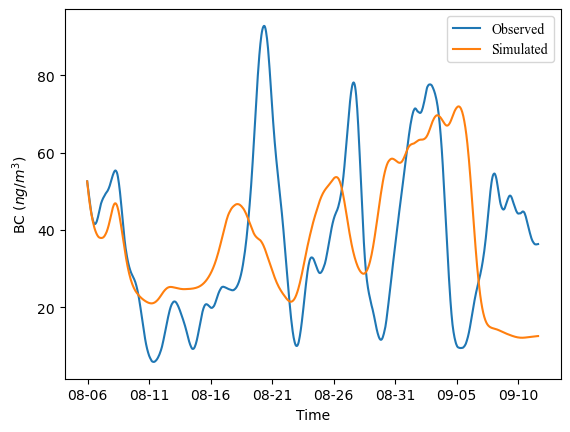

In [1]:
## 画模拟的与实际的图
## 再曲前面的部分，就是模拟得较好的部分
## 后面模拟得不好就略去吧


import scipy.io as sio
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd
import matplotlib.dates as mdates

# 读取数据
BC_real_data = sio.loadmat('./Mat_Files/BC_real.mat')  
BC_all_data=sio.loadmat('./Mat_Files/BC_control.mat')
time_index_data = pd.date_range(start='2020-08-05 23:00', end='2020-09-11 15:00', freq='h')


fig, ax1 = plt.subplots()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.family'] = ['Times New Roman'] 
ax1.xaxis.set_major_locator(plt.MaxNLocator(10)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.plot(time_index_data,BC_real_data['BC_smooth'].flatten(),label='Observed')
ax1.plot(time_index_data,BC_all_data['BC_control'].flatten(),label='Simulated')
ax1.set_xlabel('Time')
ax1.set_ylabel('BC $(ng/m^3)$')
ax1.legend()
plt.savefig('../Figures/Figure2_观测与模拟.svg')
plt.show()



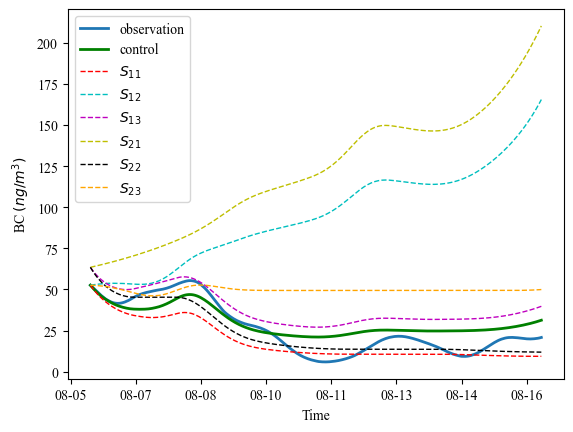

In [2]:
## 读取mat文件

import scipy.io as sio
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd
import matplotlib.dates as mdates


BC_real_data = sio.loadmat('./Mat_Files/BC_real.mat')  
BC_control_data=sio.loadmat('./Mat_Files/BC_control.mat')
BC_s11_data=sio.loadmat('./Mat_Files/BC_s11.mat')
BC_s12_data=sio.loadmat('./Mat_Files/BC_s12.mat')
BC_s13_data=sio.loadmat('./Mat_Files/BC_s13.mat')
BC_s21_data=sio.loadmat('./Mat_Files/BC_s21.mat')
BC_s22_data=sio.loadmat('./Mat_Files/BC_s22.mat')
BC_s23_data=sio.loadmat('./Mat_Files/BC_s23.mat')
time_index_data = pd.date_range(start='2020-08-05 23:00', end='2020-09-11 15:00', freq='h')


## 后面模拟不准的还管它干啥捏
## 那截取一部分出来
## 截取这部分的原因是这部分数据比较真实
## 相关系数较高达到0.7
## 越到后面相关系数越低模拟不准了

choose=250
BC_real=BC_real_data['BC_smooth'].flatten()[0:choose]
BC_control=BC_control_data['BC_control'].flatten()[0:choose]
BC_s11 = BC_s11_data['BC_s11'].flatten()[0:choose]
BC_s12 = BC_s12_data['BC_s12'].flatten()[0:choose]
BC_s13 = BC_s13_data['BC_s13'].flatten()[0:choose]
BC_s21 = BC_s21_data['BC_s21'].flatten()[0:choose]
BC_s22 = BC_s22_data['BC_s22'].flatten()[0:choose]
BC_s23 = BC_s23_data['BC_s23'].flatten()[0:choose]
time_index=time_index_data[0:choose]
    
fig, ax1 = plt.subplots()
plt.rcParams['font.family'] = ['Times New Roman'] 
ax1.xaxis.set_major_locator(plt.MaxNLocator(10)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax1.plot(time_index,BC_real,label='observation',linewidth=2,linestyle='-')
ax1.plot(time_index,BC_control,label='control',linewidth=2,linestyle='-',color='g')
ax1.plot(time_index,BC_s11,label='$S_{11}$',linewidth=1,linestyle='--',color='r')
ax1.plot(time_index,BC_s12,label='$S_{12}$',linewidth=1,linestyle='--',color='c')
ax1.plot(time_index,BC_s13,label='$S_{13}$',linewidth=1,linestyle='--',color='m')
ax1.plot(time_index,BC_s21,label='$S_{21}$',linewidth=1,linestyle='--',color='y') 
ax1.plot(time_index,BC_s22,label='$S_{22}$',linewidth=1,linestyle='--',color='k')
ax1.plot(time_index,BC_s23,label='$S_{23}$',linewidth=1,linestyle='--',color='orange') 
ax1.set_xlabel('Time')
ax1.set_ylabel('BC $(ng/m^3)$')
ax1.legend()
plt.savefig('../Figures/Figure3_七种不同的模拟结果.svg')
plt.show()



In [54]:
ans=(np.mean(BC_control)-np.mean(BC_s11))
ans
np.mean(BC_s11)

18.57433389226161

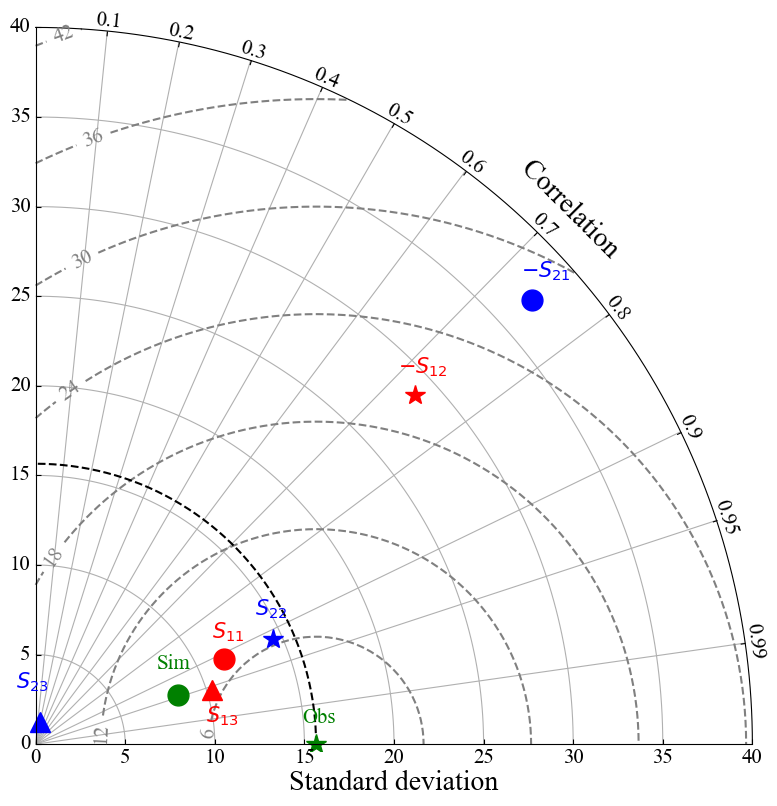

In [44]:
from taylor import TaylorDiagram


fig = plt.figure(figsize=(8,8))
r2_locs=np.arange(0,45,5)   
td=TaylorDiagram(fig=fig,refsample=BC_real,r2_locs=r2_locs)

size=15
[std1,corr1]=td.plot_taylor(BC_control,'go',markersize=size,label='Control Group')   
[std2,corr2]=td.plot_taylor(BC_real,'g*',markersize=size,label='Observation') 
[std3,corr3]=td.plot_taylor(BC_s11,'ro',markersize=size,label='$S_{11}$')
[std4,corr4]=td.plot_taylor(BC_s12,'r*',markersize=size,label='$S_{12}$') 
[std5,corr5]=td.plot_taylor(BC_s13,'r^',markersize=size,label='$S_{13}$')
[std6,corr6]=td.plot_taylor(BC_s21,'bo',markersize=size,label='$S_{21}$')
[std7,corr7]=td.plot_taylor(BC_s22,'b*',markersize=size,label='$S_{22}$')
[std8,corr8]=td.plot_taylor(BC_s23,'b^',markersize=size,label='$S_{23}$')

plt.tight_layout()
plt.text((std1+0.5)*corr1/max(r2_locs),(std1*np.sqrt(1-corr1**2)+3.5)/max(r2_locs),
         'Sim',color='g',fontsize=15,transform=fig.transFigure)  
plt.text((std2)*corr2/max(r2_locs),(std2*np.sqrt(1-corr2**2)+3.5)/max(r2_locs),
         'Obs',color='g',fontsize=15,transform=fig.transFigure)
plt.text((std3+0.7)*corr3/max(r2_locs),(std3*np.sqrt(1-corr3**2)+3)/max(r2_locs),
         '$S_{11}$',color='r',fontsize=15,transform=fig.transFigure)
plt.text((std4-1)*np.abs(corr4)/max(r2_locs),(std4*np.sqrt(1-np.abs(corr4)**2)+1.5)/max(r2_locs),
         '$-S_{12}$',color='r',fontsize=15,transform=fig.transFigure)
plt.text((std5+1)*corr5/max(r2_locs),(std5*np.sqrt(1-corr5**2)+0.5)/max(r2_locs),
         '$S_{13}$',color='r',fontsize=15,transform=fig.transFigure)
plt.text((std6-1.5)*np.abs(corr6)/max(r2_locs),(std6*np.sqrt(1-np.abs(corr6)**2)+1)/max(r2_locs),
         '$-S_{21}$',color='b',fontsize=15,transform=fig.transFigure)
plt.text((std7)*corr7/max(r2_locs),(std7*np.sqrt(1-corr7**2)+3)/max(r2_locs),
         '$S_{22}$',color='b',fontsize=15,transform=fig.transFigure)
plt.text((std8+5)*corr8/max(r2_locs),(std8*np.sqrt(1-corr8**2)+4)/max(r2_locs),
         '$S_{23}$',color='b',fontsize=15,transform=fig.transFigure)

# plt.legend(loc='upper right',fontsize=10)
plt.savefig('../Figures/Figure4_七种不同模拟结果的泰勒图.svg')
plt.show()

In [41]:
corr1,corr2,corr3,corr4,corr5,corr6,corr7,corr8

(0.9455715668549578,
 1.0,
 0.9111446807101569,
 -0.735936182743234,
 0.9555323630357988,
 -0.7451887273859017,
 0.9142263409629238,
 0.21093657906769017)

In [42]:
std1,std2,std3,std4,std5,std6,std7,std8

(8.379290062574313,
 15.651640906257139,
 11.53798955424136,
 28.79829503761307,
 10.330676506902138,
 37.1674251890789,
 14.51047097155452,
 1.2879525912908472)

In [43]:
y1=0.9*corr1+0.1*std1
y2=0.9*corr2+0.1*std2
y3=0.9*corr3+0.1*std3
y4=0.9*corr4+0.1*std4
y5=0.9*corr5+0.1*std5
y6=0.9*corr6+0.1*std6
y7=0.9*corr7+0.1*std7
y8=0.9*corr8+0.1*std8

y1,y2,y3,y4,y5,y6,y7,y8

(1.6889434164268935,
 2.465164090625714,
 1.9738291680632774,
 2.217486939292397,
 1.8930467774224329,
 3.0460726642605787,
 2.2738508040220835,
 0.3186381802900059)